In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [3]:
4 * 4 * 512

8192

In [4]:
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=8192))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

In [5]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
with open('vggfeatures.h5', 'rb') as f:
    features = pickle.load(f)
with open('vgglabels.h5', 'rb') as f:
    labels = pickle.load(f)

In [7]:
with open('vggfeatures_test.h5', 'rb') as f:
    features_test = pickle.load(f)
with open('vgglabels_test.h5', 'rb') as f:
    labels_test = pickle.load(f)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               4194816   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

In [9]:
history = model.fit(features, labels, epochs=30, batch_size=50, validation_data=(features_test, labels_test))

Epoch 1/30
40/40 [==============================] - 2s 26ms/step - loss: 0.5766 - accuracy: 0.7255 - val_loss: 0.2892 - val_accuracy: 0.8790
Epoch 2/30
40/40 [==============================] - 1s 25ms/step - loss: 0.3052 - accuracy: 0.8730 - val_loss: 0.2633 - val_accuracy: 0.8920
Epoch 3/30
40/40 [==============================] - 1s 21ms/step - loss: 0.2310 - accuracy: 0.9090 - val_loss: 0.2748 - val_accuracy: 0.8940
Epoch 4/30
40/40 [==============================] - 1s 21ms/step - loss: 0.1740 - accuracy: 0.9285 - val_loss: 0.2868 - val_accuracy: 0.8820
Epoch 5/30
40/40 [==============================] - 1s 22ms/step - loss: 0.1350 - accuracy: 0.9460 - val_loss: 0.2957 - val_accuracy: 0.9040
Epoch 6/30
40/40 [==============================] - 1s 21ms/step - loss: 0.1604 - accuracy: 0.9425 - val_loss: 0.2737 - val_accuracy: 0.9020
Epoch 7/30
40/40 [==============================] - 1s 21ms/step - loss: 0.0994 - accuracy: 0.9620 - val_loss: 0.3737 - val_accuracy: 0.8990
Epoch 8/30
40

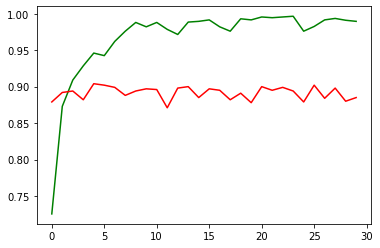

In [10]:
epochs = range(30)
plt.plot(epochs, history.history['accuracy'], color='green')
plt.plot(epochs, history.history['val_accuracy'], color='red')